In [1]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (60.0, 60.0)
import matplotlib.pyplot as plt
import sem
import scipy.linalg as la
from math import *

In [2]:
def mesh(alpha, N):
    return .5*np.sin(np.linspace(-pi/2+alpha,pi/2-alpha,N))/abs(sin((pi/2-alpha)))

In [3]:
def wall_units(yl, Nz, p, Re, plot=False):
    lstar=1/Re;
    As, Bs, Cs, Ds, z, w = sem.semhat(p)
    y_gll = np.zeros(0)
    for i in range(len(yl)-1):
        y_gll = np.append(y_gll, yl[i]+ (z+1.)/2. * (yl[i+1]-yl[i]))
    ym_vec = (y_gll[1:] - y_gll[:-1]) / lstar
    y_p = (y_gll-y_gll[0])/lstar
    ym = np.max(ym_vec)
    y1 = y_p[3]
    y10=np.max(ym_vec[1:2*p+3])
    y10=np.max(ym_vec[1:11])
    y10 = y_p[9]
    if plot:
        plt.plot(yl,np.ones(yl.size))
        plt.plot(y_gll,np.ones(y_gll.size))
    
    z_gll = np.zeros(0)
    zg = np.linspace(0,24,Nz)
    for i in range(len(zg)-1):
        z_gll = np.append(z_gll, zg[i]+ (z+1.)/2. * (zg[i+1]-zg[i]))
    zn = np.max(z_gll[1:]-z_gll[:-1])/lstar
    return ym, y1, y10, zn

def plot_units(yms, y1s, y10s, zms, line=None):
    plt.plot(alphs,yms, label='Ym')
    plt.plot(alphs,y1s, label='y4')
    plt.plot(alphs,y10s, label='y10')
    plt.plot(alphs,zms, label = 'Zm')
    plt.axhline(1.0, color='green')
    plt.axhline(6.0, color='red')
    plt.axhline(5.0, color='blue')
    if line is not None:
        plt.axvline(line)
    plt.grid()
    plt.legend()
    plt.xlabel('alpha')

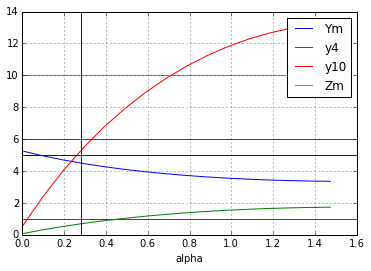

In [4]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=4300;
N = 31
Nl = 65
Nz = 513
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm = wall_units(yl,Nz,N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

plot_units(yms, y1s, y10s, zms, .28)

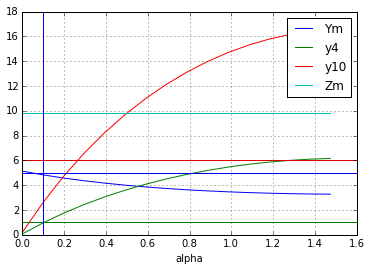

In [5]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=4000;
N = 7
Nl = 257
Nz = 2049
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

plot_units(yms, y1s, y10s, zms, .1)